In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_excel(r'C:\Users\vr29\AICoE\Estimator\Model Building Project\Data2.xlsx')

In [4]:
df.head()

,Features,Complexity,Frequency,Density,Time in min,Converted
0,proc opt model1,Simple,2,19,120,Converted
1,proc opt model2,Intermediate 2,1,62,90,Converted
2,proc opt model3,Complex,1,186,120,Converted
3,proc nlp,Simple,1,16,60,Converted
4,proc sql,Intermediate 1,1,44,90,Converted


In [5]:
df.describe()

,Frequency,Density,Time in min
count,14.000000,14.000000,14.000000
mean,4.142857,84.857143,139.285714
std,5.503246,126.721291,60.696507
min,1.000000,4.000000,60.000000
25%,1.000000,22.250000,90.000000
50%,2.000000,37.500000,120.000000
75%,5.250000,69.500000,180.000000
max,21.000000,489.000000,240.000000


## EDA

In [5]:
df['Converted'].value_counts()

Converted        11
Not Converted     3
Name: Converted, dtype: int64

In [6]:
df['Converted'].value_counts(normalize=True)

Converted        0.785714
Not Converted    0.214286
Name: Converted, dtype: float64

Boxplot for outliers 

C:\Users\PRCHATUR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

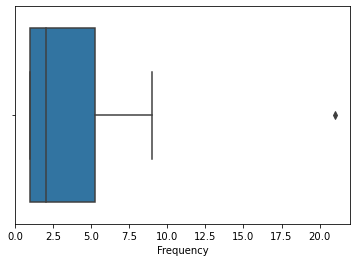

In [7]:
import seaborn as sns
sns.boxplot(df['Frequency'])

C:\Users\PRCHATUR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Density'>

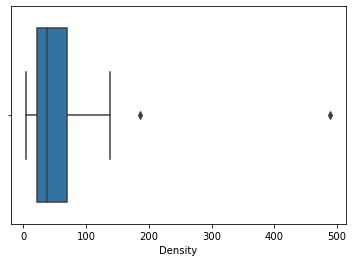

In [8]:
sns.boxplot(df['Density'])

C:\Users\PRCHATUR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time in min'>

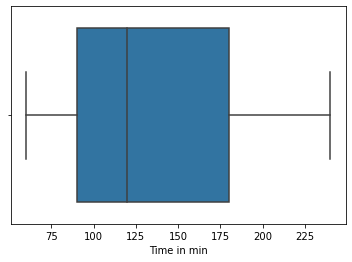

In [9]:
sns.boxplot(df['Time in min'])

We have some outliers but these are the real value so treatment is not mandatory 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Features     14 non-null     object
 1   Complexity   14 non-null     object
 2   Frequency    14 non-null     int64 
 3   Density      14 non-null     int64 
 4   Time in min  14 non-null     int64 
 5   Converted    14 non-null     object
dtypes: int64(3), object(3)
memory usage: 800.0+ bytes


## Correlation

             Frequency   Density  Time in min
Frequency     1.000000  0.383225     0.523086
Density       0.383225  1.000000     0.508937
Time in min   0.523086  0.508937     1.000000


<AxesSubplot:>

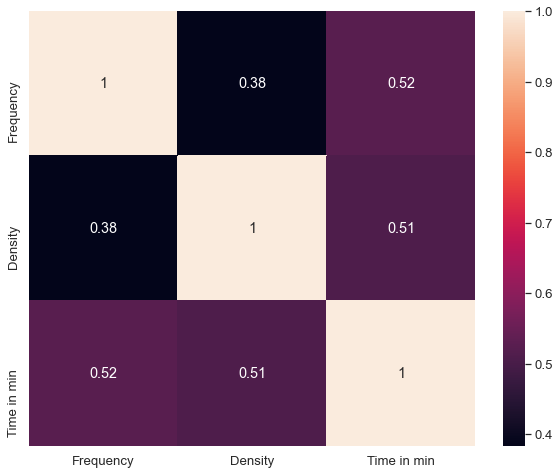

In [11]:
print(df.corr())
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Frequency','Density','Time in min']].corr(),annot=True)

## Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y=df['Converted']
x=df.drop(['Converted'],axis=1)

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=123)

In [27]:
print('x_train:  ',x_train.shape)
print('x_test:  ',x_test.shape)
print('y_train:  ',y_train.shape)
print('y_test:  ',y_test.shape)

x_train:   (9, 5)
x_test:   (5, 5)
y_train:   (9,)
y_test:   (5,)


In [28]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [29]:
x_train=sc.fit_transform(x_train)
x_train

array([[ 0.10878566, -1.14904852,  2.60962118,  0.19416922,  0.77538829],
       [-0.38074981, -0.35355339, -0.38531319, -0.4911339 ,  0.77538829],
       [-1.35982073,  1.23743687, -0.54294132, -0.72413696, -1.21846731],
       [ 0.84308885,  1.23743687, -0.54294132, -0.64190058, -1.21846731],
       [ 1.33262432,  0.44194174, -0.54294132, -0.32666115, -0.72000341],
       [-0.87028527, -1.14904852,  0.71808368,  2.59958315,  1.77231608],
       [-0.13598207, -0.35355339, -0.54294132, -0.51854602, -0.72000341],
       [ 1.57739205, -1.14904852, -0.54294132,  0.52311471, -0.22153951],
       [-1.115053  ,  1.23743687, -0.22768507, -0.61448846,  0.77538829]])

In [30]:
x_test=sc.transform(x_test)
x_test

array([[-0.62551754,  1.23743687,  0.40282743, -0.49798693,  1.77231608],
       [ 0.35355339,  1.23743687,  0.24519931, -0.55281118, -0.22153951],
       [ 1.82215978, -0.35355339, -0.54294132, -0.45001571, -0.72000341],
       [ 1.08785659,  1.23743687, -0.38531319, -0.62134149, -0.22153951],
       [ 0.59832112, -0.35355339, -0.38531319, -0.25813084,  0.77538829]])

In [31]:
clf=MLPClassifier(hidden_layer_sizes=100, max_iter=50000, solver='sgd', verbose=True, random_state=1,tol=0.0001)

In [32]:
clf.fit(x_train,y_train)

Iteration 1, loss = 0.70228364
Iteration 2, loss = 0.70076166
Iteration 3, loss = 0.69859972
Iteration 4, loss = 0.69587087
Iteration 5, loss = 0.69264469
Iteration 6, loss = 0.68899012
Iteration 7, loss = 0.68496053
Iteration 8, loss = 0.68060344
Iteration 9, loss = 0.67596563
Iteration 10, loss = 0.67108954
Iteration 11, loss = 0.66601354
Iteration 12, loss = 0.66077223
Iteration 13, loss = 0.65539672
Iteration 14, loss = 0.64991489
Iteration 15, loss = 0.64435269
Iteration 16, loss = 0.63873176
Iteration 17, loss = 0.63310155
Iteration 18, loss = 0.62745342
Iteration 19, loss = 0.62179968
Iteration 20, loss = 0.61615384
Iteration 21, loss = 0.61052854
Iteration 22, loss = 0.60493309
Iteration 23, loss = 0.59938078
Iteration 24, loss = 0.59387708
Iteration 25, loss = 0.58842188
Iteration 26, loss = 0.58302430
Iteration 27, loss = 0.57768944
Iteration 28, loss = 0.57242376
Iteration 29, loss = 0.56722707
Iteration 30, loss = 0.56210327
Iteration 31, loss = 0.55705448
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=50000, random_state=1,
              solver='sgd', verbose=True)

# Prediction on training data

In [33]:
y_pred=clf.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(y_train,y_pred)

array([[8, 0],
       [0, 1]], dtype=int64)

In [36]:
clf.score(x_train,y_train) #mean accuracy on the given train data and labels.

1.0

In [37]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



AUC: 1.000


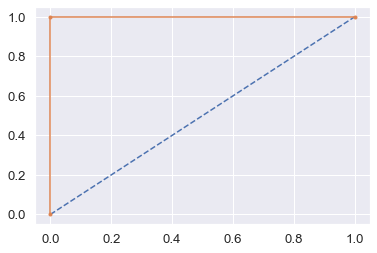

In [38]:
probs = clf.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


# Prediction on test data

In [39]:
y_pred_t=clf.predict(x_test)
y_pred_t

array([1, 0, 0, 0, 0], dtype=int8)

In [40]:
confusion_matrix(y_test,y_pred_t)

array([[3, 0],
       [1, 1]], dtype=int64)

In [41]:
clf.score(x_test,y_test) #mean accuracy on the given test data and labels.

0.8

In [42]:
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



AUC: 1.000


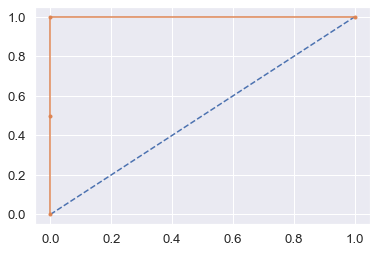

In [43]:
probs = clf.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500,700],
    'max_iter': [5000,2500,7000,6000,10000],
    'solver': ['sgd','adam'],
    'tol': [0.001,0.0001,0.00001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)


In [58]:
grid_search.fit(x_train,y_train)

C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\skle

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500, 700],
                         'max_iter': [5000, 2500, 7000, 6000, 10000],
                         'solver': ['sgd', 'adam'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [59]:
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.001}

In [60]:
best_grid=grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001)

In [61]:
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

In [62]:
confusion_matrix(y_train,ytrain_predict)

array([[8, 0],
       [1, 0]], dtype=int64)

In [63]:
clf.score(x_train,y_train) #mean accuracy on the given train data and labels.

1.0

In [64]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


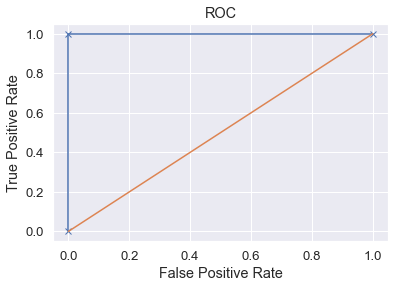

Area under Curve is 1.0


In [65]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

In [66]:
confusion_matrix(y_test,ytest_predict)

array([[3, 0],
       [2, 0]], dtype=int64)

In [67]:
clf.score(x_test,y_test) #mean accuracy on the given test data and labels.

0.8

In [68]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRCHATUR\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


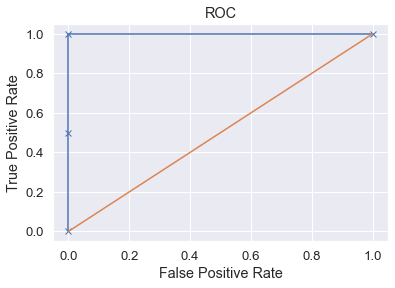

Area under Curve is 1.0


In [69]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))